In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Dosepy import image
from Dosepy.tools.gamma import chi

In [2]:
# Load film and dcm array form csv
path_to_film = "/media/luis/TOMO/Dosepy/gamma_testing/film_dose_map_isle.csv"
path_to_dcm = "/media/luis/TOMO/Dosepy/gamma_testing/dcm_dose_map_isle.csv"

film_array = np.genfromtxt(path_to_film, delimiter=",")
dcm_array = np.genfromtxt(path_to_dcm, delimiter=",")

print(film_array.shape)
print(dcm_array.shape)

(590, 590)
(200, 200)


In [3]:
film = image.ArrayImage(film_array, dpi=75)
dcm = image.ArrayImage(dcm_array, dpi=25.4)

In [4]:
# Equate resolution

film.reduce_resolution_as(dcm)

film_reduced = image.ArrayImage(film.array[50:130, 40: 160], dpi=25.4)
dcm_reduced = image.ArrayImage(dcm.array[50:130, 40: 160], dpi=25.4)

In [5]:
g, p = film_reduced.gamma2D(dcm_reduced, 3, 2)

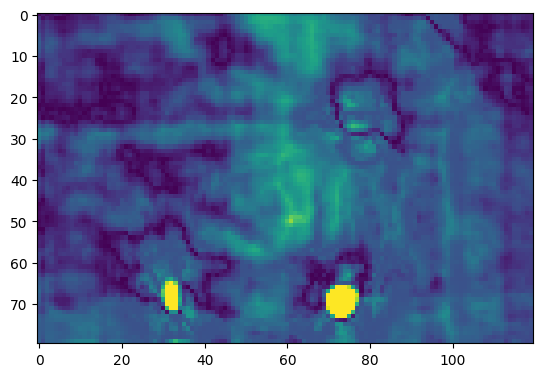

In [6]:
plt.imshow(g, vmax=2)

In [7]:
# Passing rate
p

np.float64(94.39583333333333)

94.67708333333333


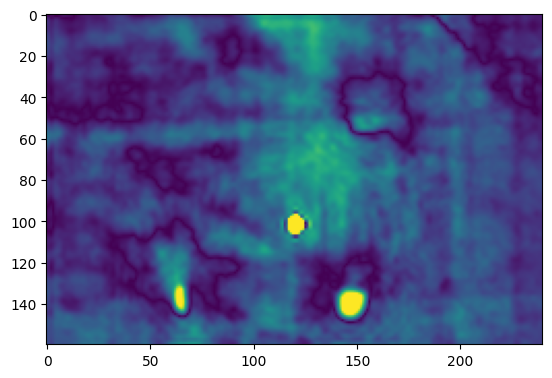

In [8]:
# Calculate Chi

chi_map, chi_rate = chi(
    reference_image = dcm_reduced,
    comparison_image = film_reduced,
    doseTA = 3,
    distTA = 2,
)
plt.imshow(chi_map, vmax=2, )
print(chi_rate)

In [9]:
print(chi_rate)

94.67708333333333


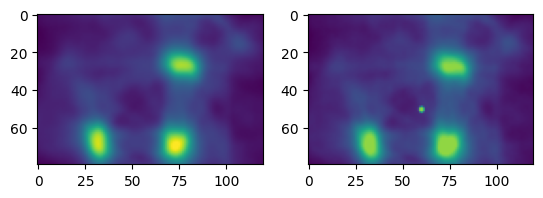

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(dcm_reduced.array, vmax=15)
ax2.imshow(film_reduced.array, vmax=15)

In [11]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        z=np.flip(chi_map, 0),
        zmin=0,
        zmax=3,
        colorscale=[
            [0, "rgb(255, 255, 250)"],
            [0.33333, "rgb(200, 200, 200)"],

            [0.33333, "rgb(150, 20, 150)"],
            [1, "rgb(0, 20, 0)"],
        ],
        
        #colorbar=dict(
        #    tick0=0,
        #    dtick=1,
        #),
    ),
)
#fig.update_yaxes(autorange=False)

In [12]:
px.imshow(chi_map, zmax=3)

In [13]:
from scipy.ndimage import sobel
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)

fig.add_trace(px.imshow(dcm_reduced.array).data[0], row=1, col=1)
px.imshow(dcm_reduced.array)

fig.add_trace(px.imshow(sobel(dcm_reduced.array, 1)).data[0], row=2, col=1)

In [14]:
px.imshow(dcm_reduced.array)

In [15]:
px.imshow(np.gradient(dcm_reduced.array, axis=1))

### Undestanding sobel

In [16]:
import plotly.express as px

uniform_increase_array = np.arange(0, 100).reshape(10, 10)
px.imshow(uniform_increase_array)

In [17]:
sobel_x = sobel(uniform_increase_array, axis=1)
px.imshow(sobel_x)

In [18]:
grad_y = sobel(uniform_increase_array, axis=0)
px.imshow(grad_y)

In [19]:
grad_x = np.gradient(uniform_increase_array, axis=1)
px.imshow(grad_x)

In [20]:
grad_y = np.gradient(uniform_increase_array, axis=0)
px.imshow(grad_y)

88.4625260082341


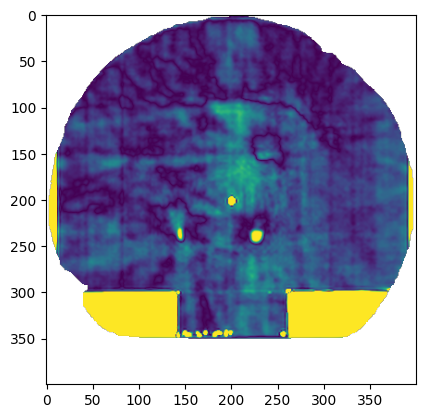

In [21]:
# Calculate Chi

chi_map, chi_rate = chi(
    reference_image = dcm,
    comparison_image = film,
    doseTA = 3,
    distTA = 2,
)
plt.imshow(chi_map, vmax=2, )
print(chi_rate)

In [22]:
px.imshow(dcm.array)

In [23]:
a=np.array([np.nan, 1, 2])
np.sum(~np.isnan(a))

np.int64(2)

In [24]:
np.sum(a<=1)

np.int64(1)

### Testing threshold

92.99731996196074


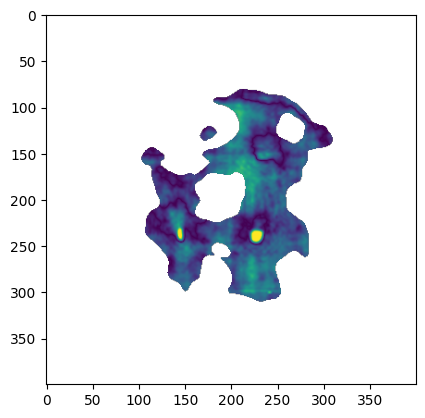

In [33]:
# Calculate Chi

chi_map, chi_rate = chi(
    reference_image = dcm,
    comparison_image = film,
    doseTA = 3,
    distTA = 2,
    threshold=30,
)
plt.imshow(chi_map, vmax=2, )
print(chi_rate)